In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path


Using TensorFlow backend.


In [2]:
# Load data set
#x_train,x_test is the training ,test data set.
#y_train,y_test is the set of labels to all the data in x_train,y_train.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
import matplotlib.pyplot as plt
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}



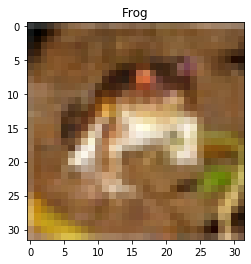

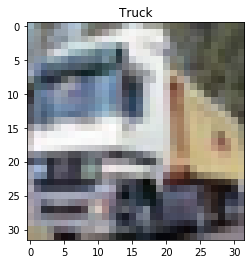

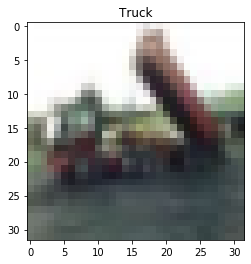

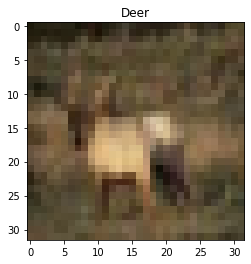

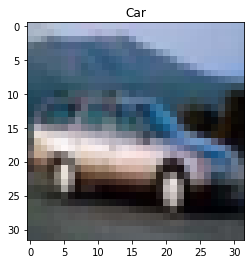

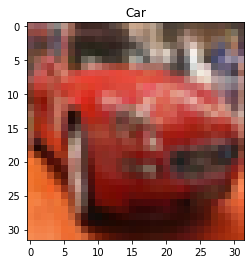

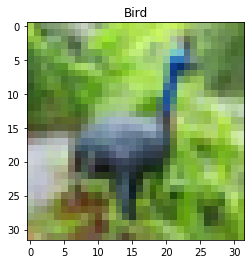

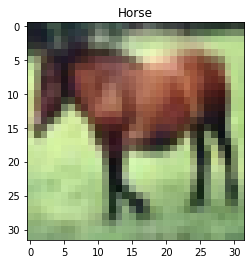

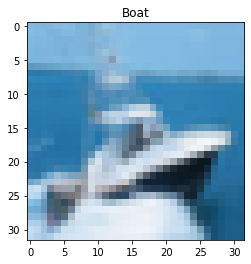

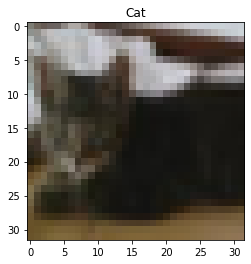

In [5]:
for i in range(10):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)
    # Show the plot on the screen
    plt.show()

In [6]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [7]:
#from tensorflow.python.framework import ops
#ops.reset_default_graph()

In [8]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPool2D
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers import Dense

#classifier = Sequential()

In [9]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))


In [10]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [11]:
# Train the model
model.fit(
    x_train,
    y_train,

    batch_size=32,
    epochs=30,
    
    validation_data=(x_test, y_test),
    shuffle=True
)


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 243s 5ms/step - loss: 1.4917 - accuracy: 0.4544 - val_loss: 1.0755 - val_accuracy: 0.6177
Epoch 2/30
50000/50000 [==============================] - 252s 5ms/step - loss: 1.0916 - accuracy: 0.6127 - val_loss: 0.9325 - val_accuracy: 0.6729
Epoch 3/30
50000/50000 [==============================] - 240s 5ms/step - loss: 0.9520 - accuracy: 0.6630 - val_loss: 0.8216 - val_accuracy: 0.7140
Epoch 4/30
50000/50000 [==============================] - 239s 5ms/step - loss: 0.8694 - accuracy: 0.6938 - val_loss: 0.7959 - val_accuracy: 0.7273
Epoch 5/30
50000/50000 [==============================] - 237s 5ms/step - loss: 0.8083 - accuracy: 0.7160 - val_loss: 0.7588 - val_accuracy: 0.7389
Epoch 6/30
50000/50000 [==============================] - 249s 5ms/step - loss: 0.7632 - accuracy: 0.7301 - val_loss: 0.7025 - val_accuracy: 0.7562
Epoch 7/30
50000/50000 [==============================] - 202s

In [17]:
 
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("model_weights.h5")

In [18]:

from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]


In [19]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()


In [20]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("model_weights.h5")


In [21]:
# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("Cat.jpg", target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img)

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]

# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

FileNotFoundError: [Errno 2] No such file or directory: 'Cat.jpg'

In [ ]:
# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))